# Checking the memory status of the machine


In [1]:
import tensorflow as tensf
tensf.test.gpu_device_name()

'/device:GPU:0'

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 14950355404972775668, name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 11345264640
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 15586656398438571868
 physical_device_desc: "device: 0, name: Tesla K80, pci bus id: 0000:00:04.0, compute capability: 3.7"]

In [3]:
#memory info of the colab system
!cat /proc/meminfo

MemTotal:       13302924 kB
MemFree:         9471540 kB
MemAvailable:   12122372 kB
Buffers:          126864 kB
Cached:          2570636 kB
SwapCached:            0 kB
Active:          1304280 kB
Inactive:        2161120 kB
Active(anon):     642164 kB
Inactive(anon):     2500 kB
Active(file):     662116 kB
Inactive(file):  2158620 kB
Unevictable:           0 kB
Mlocked:               0 kB
SwapTotal:             0 kB
SwapFree:              0 kB
Dirty:              5940 kB
Writeback:             0 kB
AnonPages:        767920 kB
Mapped:           562636 kB
Shmem:              3224 kB
KReclaimable:     143140 kB
Slab:             197664 kB
SReclaimable:     143140 kB
SUnreclaim:        54524 kB
KernelStack:        4896 kB
PageTables:         8312 kB
NFS_Unstable:          0 kB
Bounce:                0 kB
WritebackTmp:          0 kB
CommitLimit:     6651460 kB
Committed_AS:    3476144 kB
VmallocTotal:   34359738367 kB
VmallocUsed:       46576 kB
VmallocChunk:          0 kB
Percpu:          

# Importing Libraries and Dataset

In [4]:
! pip install -q kaggle

In [5]:
from google.colab import files as FILE
FILE.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rajkumarmikkili","key":"81d6e4931513f439b7b6dbe529b6a96a"}'}

In [6]:
 !mkdir ~/.kaggle 

In [7]:
!cp kaggle.json ~/.kaggle/

In [8]:
 !chmod 600 ~/.kaggle/kaggle.json

In [9]:
! kaggle datasets download -d bittlingmayer/amazonreviews

 98% 481M/493M [00:18<00:00, 15.1MB/s]
100% 493M/493M [00:19<00:00, 27.1MB/s]


In [10]:
!unzip amazonreviews.zip

Archive:  amazonreviews.zip
  inflating: test.ft.txt.bz2         
  inflating: train.ft.txt.bz2        


In [11]:
import numpy as NUMP
import bz2 as BZ

# preparing the dataset to use 

In [12]:
import pandas as PAND
def text_labeling(x):
  text_label=[]
  text=[]
  for line in BZ.BZ2File(x):
    text_decoder = line.decode("utf-8")
    text_label.append(int(text_decoder[9]) - 1)
    text.append(text_decoder[10:].strip())
  return NUMP.array(text_label),text

In [13]:
training_set_caption , training_set_text = text_labeling('train.ft.txt.bz2')
testing_set_caption, testing_set_text = text_labeling('test.ft.txt.bz2')

## Shuffling the dataset for better results

In [14]:
from sklearn.utils import shuffle
training_set_text, training_set_caption = shuffle(training_set_text, training_set_caption)
testing_set_text, testing_set_caption = shuffle(testing_set_text, testing_set_caption)

In [15]:
training_set_text[0]

"The Science Behind Mind-Body Medicine: Let's get it together! Science, medicine, thoughts, feelings, here, and seemingly not here....everything is connected! Just because our minds can only imagine so much, doesn't mean that there isn't more."

In [16]:
training_set_caption[0]

1

In [17]:
len(training_set_text)

3600000

In [18]:
len(testing_set_text)

400000

In [19]:
testing_set_text = testing_set_text[0:1000]
testing_set_caption = testing_set_caption[0:1000]

In [20]:
training_set_text = training_set_text[0:7500]
training_set_caption = training_set_caption[0:7500]

In [21]:
import re as RE
import nltk as NL
NL.download('stopwords')
from nltk.corpus import stopwords as SW
from nltk.stem.porter import PorterStemmer as PS
training_dict = []
for text in range(len(training_set_text)):
    #Clearing quotation marks
    processed_text = RE.sub('".*?"', '', training_set_text[text]) 
    #Processing by removing other than letters
    processed_text = RE.sub('[^a-zA-Z]', ' ', processed_text) 
    #using only lowercase letters
    processed_text = processed_text.lower() 
    #breaking all sentences into words
    processed_text = processed_text.split() 
    #stemming
    ps = PS() 
    all_stopwords = SW.words('english')
    all_stopwords.remove('not') 
    processed_text = [ps.stem(word) for word in processed_text if not word in set(all_stopwords)]
    #Again joining all the words into a sentence
    processed_text = ' '.join(processed_text) 
    training_dict.append(processed_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Using Bag of words model

In [22]:
from sklearn.feature_extraction.text import CountVectorizer as count_vect
features = 1500
count_vect = count_vect(max_features = features)
X = count_vect.fit_transform(training_dict).toarray()
y = training_set_caption[0:7500]

# Creating a validation set

In [23]:
from sklearn.model_selection import train_test_split as TrainTestSplit
testing_size = 0.25
seed = 0
X_training,X_validataion,y_training,y_validation = TrainTestSplit(X,y,test_size = testing_size,random_state = seed)

# Using Different ML models for training

## Navie Bayes



In [24]:
from sklearn.naive_bayes import GaussianNB as GNB
GNB_Model = GNB()
GNB_Model.fit(X_training,y_training)

GaussianNB(priors=None, var_smoothing=1e-09)

In [25]:
GNB_Y_PREDICTED = GNB_Model.predict(X_validataion)

In [26]:
from sklearn.metrics import confusion_matrix as conf,accuracy_score as ACC
Conf_Mat = conf(y_validation,GNB_Y_PREDICTED)


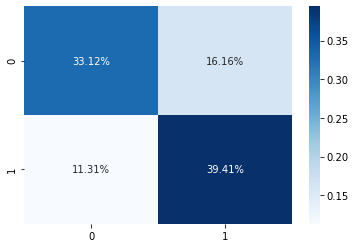

In [27]:
import matplotlib.pyplot as PLOT
import seaborn as SEA
toggle = True
colors = 'Blues'
SEA.heatmap(Conf_Mat/NUMP.sum(Conf_Mat), annot=toggle, 
            fmt='.2%', cmap=colors)

In [28]:
GNB_ACC = ACC(y_validation, GNB_Y_PREDICTED)
print(GNB_ACC)

0.7253333333333334


In [29]:
from sklearn.metrics import f1_score as F1
GNB_F1 = F1(y_validation,GNB_Y_PREDICTED)
print(GNB_F1)

0.7415955845459107


In [30]:
from sklearn.metrics import precision_score as PScore
GNB_PScore = PScore(y_validation,GNB_Y_PREDICTED)
print(GNB_PScore)


0.7092130518234165


## SVC


In [31]:
from sklearn.svm import SVC as SUPPORT
SVC_MODEL = SUPPORT(C=3,kernel = 'rbf', random_state = 0)
SVC_MODEL.fit(X_training,y_training)

SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [32]:
SVC_Y_PREDICTED = SVC_MODEL.predict(X_validataion)
print(SVC_Y_PREDICTED)

[0 1 0 ... 0 1 1]


In [33]:
Conf_Mat = conf(y_validation,SVC_Y_PREDICTED)

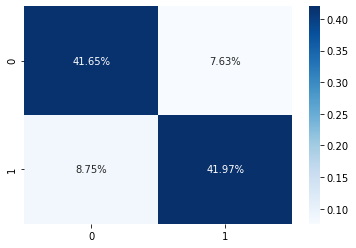

In [34]:
toggle = True
colors = 'Blues'
SEA.heatmap(Conf_Mat/NUMP.sum(Conf_Mat), annot=toggle, 
            fmt='.2%', cmap=colors)

In [35]:
SVC_ACC = ACC(y_validation, SVC_Y_PREDICTED)
print(SVC_ACC)

0.8362666666666667


In [36]:
SVC_F1 = F1(y_validation,SVC_Y_PREDICTED)
print(SVC_F1)

0.8367889420520999


In [37]:
SVC_PScore = PScore(y_validation,SVC_Y_PREDICTED)
print(SVC_PScore)

0.8462365591397849


## Decision Tree Classifier

In [38]:
from sklearn.tree import DecisionTreeClassifier as DECISION
DTR_MODEL = DECISION(random_state = 0)
DTR_MODEL.fit(X_training,y_training)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [39]:
DTR_Y_PRED = DTR_MODEL.predict(X_validataion)
print(DTR_Y_PRED)

[0 0 0 ... 1 1 0]


In [40]:
Conf_Mat = conf(y_validation,DTR_Y_PRED)

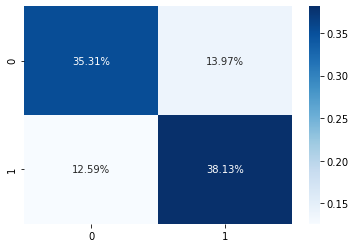

In [41]:
toggle = True
colors = 'Blues'
SEA.heatmap(Conf_Mat/NUMP.sum(Conf_Mat), annot=toggle, 
            fmt='.2%', cmap=colors)

In [42]:
DTR_ACC = ACC(y_validation, DTR_Y_PRED)
print(DTR_ACC)

0.7344


In [43]:
DTR_F1 = F1(y_validation,DTR_Y_PRED)
print(DTR_F1)

0.741701244813278


In [44]:
DTR_PScore = PScore(y_validation,DTR_Y_PRED)
print(DTR_PScore)

0.7318321392016377


## Random Forest Classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier as RANDOM
RFC_MODEL = RANDOM(max_depth = 100,random_state = 0)
RFC_MODEL.fit(X_training,y_training)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [46]:
RFC_Y_PRED = RFC_MODEL.predict(X_validataion)
print(RFC_Y_PRED)

[0 1 0 ... 0 1 1]


In [47]:
Conf_Mat = conf(y_validation,RFC_Y_PRED)

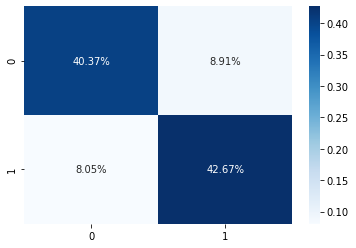

In [48]:
toggle= True
colors= 'Blues'
SEA.heatmap(Conf_Mat/NUMP.sum(Conf_Mat), annot=toggle, 
            fmt='.2%', cmap=colors)

In [49]:
RFC_ACC = ACC(y_validation, RFC_Y_PRED)
print(RFC_ACC)

0.8304


In [50]:
RFC_F1 = F1(y_validation,RFC_Y_PRED)
print(RFC_F1)

0.8342022940563087


In [51]:
RFC_PScore = PScore(y_validation,RFC_Y_PRED)
print(RFC_PScore)

0.827300930713547


### Catboost

In [52]:
!pip install catboost

     |████████████████████████████████| 67.4 MB 27 kB/s 


In [53]:
from catboost import CatBoostClassifier as CAT
CAT_MODEL = CAT(iterations=1000,
                           learning_rate=1,
                           depth=10)
CAT_MODEL.fit(X_training,y_training)


0:	learn: 0.5604346	total: 148ms	remaining: 2m 27s
1:	learn: 0.4924696	total: 251ms	remaining: 2m 5s
2:	learn: 0.4533706	total: 360ms	remaining: 1m 59s
3:	learn: 0.4332427	total: 463ms	remaining: 1m 55s
4:	learn: 0.4163959	total: 564ms	remaining: 1m 52s
5:	learn: 0.4013123	total: 663ms	remaining: 1m 49s
6:	learn: 0.3931441	total: 763ms	remaining: 1m 48s
7:	learn: 0.3834679	total: 865ms	remaining: 1m 47s
8:	learn: 0.3706560	total: 965ms	remaining: 1m 46s
9:	learn: 0.3537326	total: 1.07s	remaining: 1m 45s
10:	learn: 0.3370342	total: 1.17s	remaining: 1m 45s
11:	learn: 0.3198557	total: 1.26s	remaining: 1m 44s
12:	learn: 0.3079997	total: 1.36s	remaining: 1m 43s
13:	learn: 0.2931699	total: 1.46s	remaining: 1m 43s
14:	learn: 0.2767895	total: 1.56s	remaining: 1m 42s
15:	learn: 0.2622121	total: 1.66s	remaining: 1m 42s
16:	learn: 0.2585064	total: 1.76s	remaining: 1m 41s
17:	learn: 0.2483885	total: 1.86s	remaining: 1m 41s
18:	learn: 0.2379322	total: 1.96s	remaining: 1m 41s
19:	learn: 0.2350098	to

In [54]:
CAT_Y_PRED = CAT_MODEL.predict(X_validataion)
print(CAT_Y_PRED)

[0 1 0 ... 0 1 1]


In [55]:
Conf_Mat = conf(y_validation,CAT_Y_PRED)

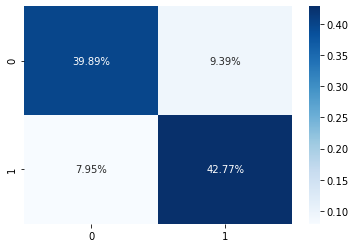

In [56]:
toggle = True
colors = 'Blues'
SEA.heatmap(Conf_Mat/NUMP.sum(Conf_Mat), annot=True, 
            fmt='.2%', cmap=colors)

In [57]:
CAT_ACC = ACC(y_validation, CAT_Y_PRED)
print(CAT_ACC)

0.8266666666666667


In [58]:
CAT_F1 = F1(y_validation,CAT_Y_PRED)
print(CAT_F1)

0.8315189217210989


In [59]:
CAT_PScore = PScore(y_validation,CAT_Y_PRED)
print(CAT_PScore)

0.820040899795501


### Accuracy Score

In [60]:
accuracy_data = [['NB' , GNB_ACC*100], ['SVC', SVC_ACC*100],['DTC',DTR_ACC*100],['RFC',RFC_ACC*100],['CAT',CAT_ACC*100]]

In [61]:
df = PAND.DataFrame(accuracy_data, columns = ['Models', 'Accuracy'])
df

,Models,Accuracy
0,NB,72.533333
1,SVC,83.626667
2,DTC,73.440000
3,RFC,83.040000
4,CAT,82.666667


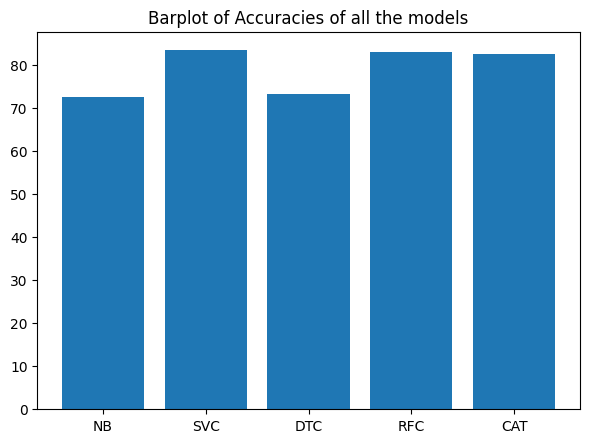

In [62]:
size = (7,5)
pixels = 100
fig, axes = PLOT.subplots(figsize=size, dpi=pixels)
PLOT.bar(df.Models, height=df.Accuracy)
PLOT.title('Barplot of Accuracies of all the models');

### F1 Score

In [63]:
f1_score_data = [['NB' , GNB_F1*100], ['SVC', SVC_F1*100],['DTC',DTR_F1*100],['RFC',RFC_F1*100],['CAT',CAT_F1*100]]

In [64]:
df = PAND.DataFrame(f1_score_data, columns = ['Models', 'F1Score'])
df

,Models,F1Score
0,NB,74.159558
1,SVC,83.678894
2,DTC,74.170124
3,RFC,83.420229
4,CAT,83.151892


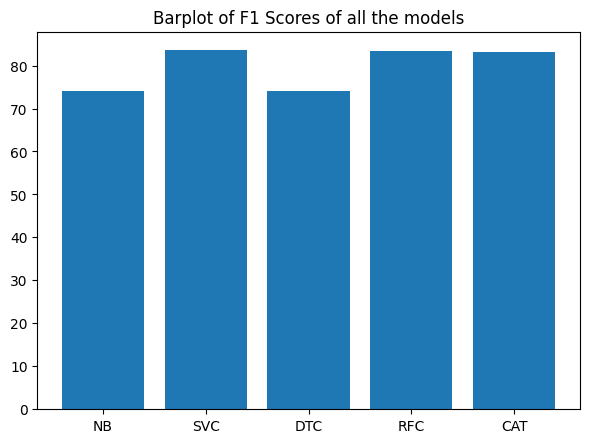

In [65]:
size = (7,5)
pixels = 100
fig, axes = PLOT.subplots(figsize=size, dpi=pixels)
PLOT.bar(df.Models, height=df.F1Score)
PLOT.title('Barplot of F1 Scores of all the models');

### Precision Score

In [66]:
precison_score_data = [['NB' , GNB_PScore*100], ['SVC', SVC_PScore*100],['DTC',DTR_PScore*100],['RFC',RFC_PScore*100],['CAT',CAT_PScore*100]]

In [67]:
df = PAND.DataFrame(precison_score_data, columns = ['Models', 'PrecisionScore'])
df

,Models,PrecisionScore
0,NB,70.921305
1,SVC,84.623656
2,DTC,73.183214
3,RFC,82.730093
4,CAT,82.004090


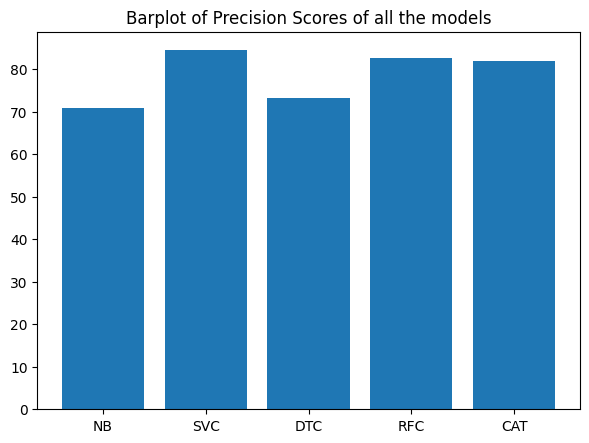

In [68]:
size = (7,5)
pixels = 100
fig, axes = PLOT.subplots(figsize=size, dpi=pixels)
PLOT.bar(df.Models, height=df.PrecisionScore)
PLOT.title('Barplot of Precision Scores of all the models');